In [ ]:
from IPython.display import Image
import csv
from PIL import Image as pil_Image
# from keras import preprocessing
import tensorflow.keras.preprocessing.image as tfimgpp




In [ ]:
imgs = []
classes = []

with open(r"D:\Nepali_character_Recognisation\Nepali_Character_dataset\Nepali_char_label.csv",'r',encoding = 'utf-8') as csv_file:
    # here Give the File name D:\Nepali_character_Recognisation\Nepali_Character_dataset\Labels_Devnagari.csv
    csv_reader = csv.reader(csv_file)
    i =0
    for row in csv_reader:         
        if i>0: 
            img = tfimgpp.img_to_array(pil_Image.open(row[1]))
            img /=255.0
            imgs.append((row[1],row[3],img))
            classes.append(row[2])
        i+=1
        


                  
                  
  

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Nepali_character_Recognisation\\Nepali_Character_dataset\\Nepali_char_label.csv'

In [ ]:
print(imgs[0][2].shape)
print(imgs[0])

#

In [29]:
print(classes)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',

In [34]:
len(imgs)

12912

In [36]:
# Here we are shuffling the data and split it 
# into 80% training data , 20% intotesting data
import random
random.shuffle(imgs)
split_idx = int(0.8*len(imgs))
train = imgs[:split_idx]
test = imgs[
    split_idx:]

print(len(imgs))
print(split_idx)
print("Total no of traingin data:",len(train))
print("Total number of testing data:",len(test))

12912
10329
Total no of traingin data: 10329
Total number of testing data: 2583


In [37]:
# we use these tuple with three different values,
#Collecting these tuples into  a matrix
import numpy as np
train_input = np.asarray(list(map(lambda row:row[2],train)))
test_input = np.asarray(list(map(lambda row:row[2],test)))

train_output = np.asarray(list(map(lambda row: row[1],train)))
test_output = np.asarray(list(map(lambda row: row[1],test)))
# print(type(train_input))
# print(type(train_output))

In [41]:
# importing LabelEncoder and OneHotEncoder fromsklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# converting class names into integers
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(classes)

#converting integers into one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded),1)
onehot_encoder.fit(integer_encoded)

#convert train and test output to one-hot
train_output_int = label_encoder.fit_transform(train_output)
train_output = onehot_encoder.fit_transform(train_output_int.reshape(len(train_output_int),1))
test_output_int = label_encoder.transform(test_output)
test_output = onehot_encoder.transform(test_output_int.reshape(len(test_output_int),1))
num_classes = len(label_encoder.classes_)
print("Number of classes: %d"%num_classes)

Number of classes: 57


In [42]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D


In [ ]:
# #CNN design
# model = Sequential()
# model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape=np.shape(train_input[0])))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(32,(3,3),activation='relu'))
# model.add(Flatten())
# model.add(Dense(1024,activation='tanh'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes,activation='softmax'))
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics =['accuracy'])
# print(model.summary())

In [40]:
# import time
# result =[]
# for conv2d_count in [1,2]:
#     for dense_size in [128,256,512,1024,2048]:
#         for dropout in [0.0,0.25,0.50,0.75]:
#             model =Sequential()
#             for i in range(conv2d_count):
#                 if i==0:
#                     model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=np.shape(train_input[0])))
#                 else:
#                     model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
#                 model.add(MaxPooling2D(pool_size=(2,2)))
#             model.add(Flatten())
#             model.add(Dense(dense_size,activation='tanh'))
#             if dropout > 0.0:
#                 model.add(Dropout(dropout))
#             model.add(Dense(num_classes,activation='softmax'))
#             model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
#
#             log_dir = './logs/conv2d_%d-dense_%d-dropout_%.2f'%(conv2d_count,dense_size,dropout)
#             tensorboard = keras.callbacks.TensorBoard(log_dir = log_dir)
#
#             start=time.time()
#             model.fit(train_input,train_output,batch_size=32,epochs=1,verbose=2,validation_split=0.2)
#             score = model.evaluate(test_input,test_output,verbose=2)
#             end = time.time()
#

NameError: name 'num_classes' is not defined

### Rebuilding the model with best parameters


In [43]:
#CNN design
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape=np.shape(train_input[0])))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics =['accuracy'])
print(model.summary())

#joining the trainging and testing data so we train the network on all data we have availabel to us 
model.fit(np.concatenate((train_input,test_input)), np.concatenate((train_output,test_output)), batch_size = 32, epochs= 10 , verbose = 2)
#saving the trained model
model.save("./Nepali_char_OCR.model")
# saving the label (to reverse on-hot encoding)
np.save('classes.npy',label_encoder.classes_)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 34, 34, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               921728    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                      

INFO:tensorflow:Assets written to: ./Devanagari_OCR.model\assets


INFO:tensorflow:Assets written to: ./Devanagari_OCR.model\assets


In [48]:
#Loading the pre-trained model and predict the math symbol for an arbiratrary image;
import keras.models
model2 = keras.models.load_model("Devanagari_OCR.model")
print(model2.summary())

#resotore the classname to integer encoder
label_encoder2 = LabelEncoder()
label_encoder2.classes_ = np.load('classes.npy')

#defining the predict function
def predict(img_path):
    newimg = tfimgpp.img_to_array(pil_Image.open(img_path))
    newimg /=255.0
    
    #doing the prediction
    prediction = model2.predict (newimg.reshape(1,36,36,1))
    # figure out which output neuron gad the highest score, and revers the one-hot encoding
    inverted = label_encoder2.inverse_transform([np.argmax(prediction)])
    print("Prediction : %s , confidence %.2f"%(inverted[0],np.max(prediction)))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 34, 34, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               921728    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                      

In [49]:
# newimg = keras.preprocessing.image.img_to_array(pil_Image.open(r"C:\Users\Ashim\Devnagari_dataset\6\Img_14.jpg"))
# newimg.shape

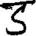

In [56]:
Image(r"D:\Nepali_character_Recognisation\Nepali_Predict\Img_16.jpg")

In [55]:
predict(r"D:\Nepali_character_Recognisation\Nepali_Predict\Img_16.jpg")

1/1 [==============================] - 0s 13ms/step
Prediction : da , confidence 0.96


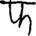

In [57]:
Image(r"D:\Nepali_character_Recognisation\Nepali_Predict\Img_31.jpg")

In [58]:
predict(r'D:\Nepali_character_Recognisation\Nepali_Predict\Img_31.jpg')

1/1 [==============================] - 0s 12ms/step
Prediction : pha , confidence 1.00


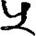

In [106]:
Image(r"D:\Devnagari_predict\Img_203.jpg")

In [107]:
predict(r'D:\Devnagari_predict\Img_203.jpg')

Prediction : five , confidence 0.99
